In [1]:
import random
import numpy as np

In [2]:
# ------ Definitions ------ #

L = 100 # The domain is modeled as a LxL square with integer vertices

def f(x,y):
    """ Function at the border of the domain """
    if (x==0) or (x==L):
        return 1
    if (y==0) or (y==L):
        return 0
    else:
        return 0
    
def g(x,y):
    """ A continuous function on the border of the domain """
    if (x==0):
        return y
    elif (x==L):
        return L-y
    elif (y==0):
        return x
    elif (y==L):
        return L-x
    else:
        return 0

In [3]:
# ------ Generating random walks that stop at the border of D ------ #

K = 10 # K is the number of random walks computed for each discrete point in the domain

def random_walk(x, y):
    """ Returns the coordinates of the random walk starting at x, y
    when it reaches the bordure of the set """
    while (x < L) and (y < L) and (x > 0) and (y > 0):
        (dx, dy) = random.choice([(0,1), (1,0), (0,-1), (-1,0)])
        x = x + dx
        y = y + dy
    return (x, y)

# Computing the approximation of the solution in every point of the domain
mean_f = np.zeros((L+1,L+1))
mean_g = np.zeros((L+1,L+1))
for i in range(L+1):
    for j in range(L+1):
        evaluated_end_points_f = np.zeros(K) 
        evaluated_end_points_g = np.zeros(K) 
        for k in range(K):
            (x, y) = random_walk(i, j)
            evaluated_end_points_f[k] = f(x, y)
            evaluated_end_points_g[k] = g(x, y)
        mean_f[j,i] = np.average(evaluated_end_points_f)
        mean_g[j,i] = np.average(evaluated_end_points_g)

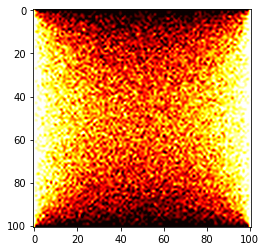

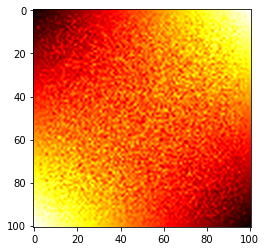

In [4]:
# ------ Printing the result ------ #

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(1)
plt.imshow(mean_f, cmap='hot', interpolation = 'lanczos')
plt.figure(2)
plt.imshow(mean_g, cmap='hot', interpolation = 'lanczos')
plt.show()